## Importing libraries

In [48]:
import numpy as np
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.0.0


In [49]:
#set the seed
from numpy.random import seed
seed(1)

## Load FMNIST dataset

In [50]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [52]:
#creating an array to access the class name based on label number.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [53]:
print(len(train_images),len(test_images))

60000 10000


In [54]:
#Checking the shape of training images
train_images[0].shape

(28, 28)

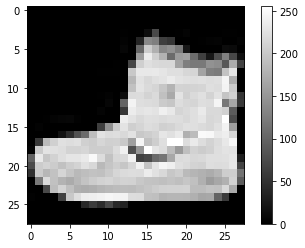

In [55]:
#check the range of pixel values
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)

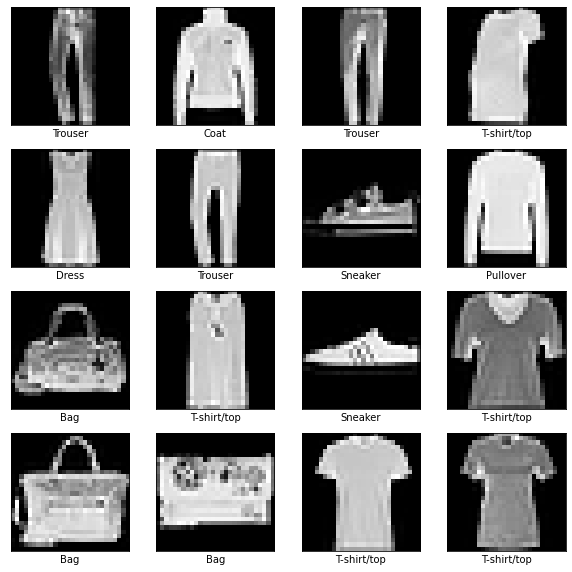

In [56]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0,len(train_images))     
    plt.imshow(train_images[rand_no], cmap='gray')
    plt.xlabel(class_names[train_labels[rand_no]])

In [57]:
#Normalizing the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

## Defining Model

In [32]:
def create_model():
    model = Sequential()
    #input layer size is 784 after flattening
    model.add(Flatten(input_shape=(28, 28)))
    #hidden layer with 512 neurons
    model.add(Dense(512, activation='relu'))
    #Output layer with 10 neurons
    model.add(Dense(10, activation='softmax'))
    return model

## Compiling Network

In [36]:
model = create_model()
model.summary()
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Fitting model

In [38]:
model.fit(x=train_images, 
          y=train_labels, 
          epochs=20, 
          validation_split=0.2, 
          callbacks=[earlystopping_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 368us/sample - loss: 1.8784 - accuracy: 0.6431 - val_loss: 1.7328 - val_accuracy: 0.7567
Epoch 2/20
48000/48000 [==============================] - 12s 245us/sample - loss: 1.7142 - accuracy: 0.7692 - val_loss: 1.6953 - val_accuracy: 0.7858
Epoch 3/20
48000/48000 [==============================] - 12s 249us/sample - loss: 1.6853 - accuracy: 0.7926 - val_loss: 1.6766 - val_accuracy: 0.8010
Epoch 4/20
48000/48000 [==============================] - 12s 246us/sample - loss: 1.6667 - accuracy: 0.8099 - val_loss: 1.6594 - val_accuracy: 0.8153
Epoch 5/20
48000/48000 [==============================] - 12s 249us/sample - loss: 1.6540 - accuracy: 0.8196 - val_loss: 1.6496 - val_accuracy: 0.8264
Epoch 6/20
48000/48000 [==============================] - 12s 245us/sample - loss: 1.6441 - accuracy: 0.8297 - val_loss: 1.6409 - val_accuracy: 0.8313
Epoch 7/20
48000/48000 [====================

## Evaluating the network

In [39]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.6028 - accuracy: 0.8439

Test accuracy: 0.8439


## Making Predictions

In [40]:
predictions = model.predict(test_images)

In [41]:
class_names[np.argmax(predictions[100])]

'Dress'

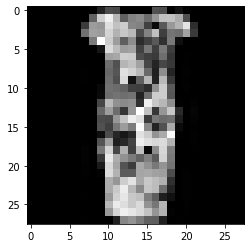

In [42]:
plt.imshow(test_images[100],cmap='gray')

In [44]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                100*np.max(predictions_array),
                class_names[true_label]),
                color=color)

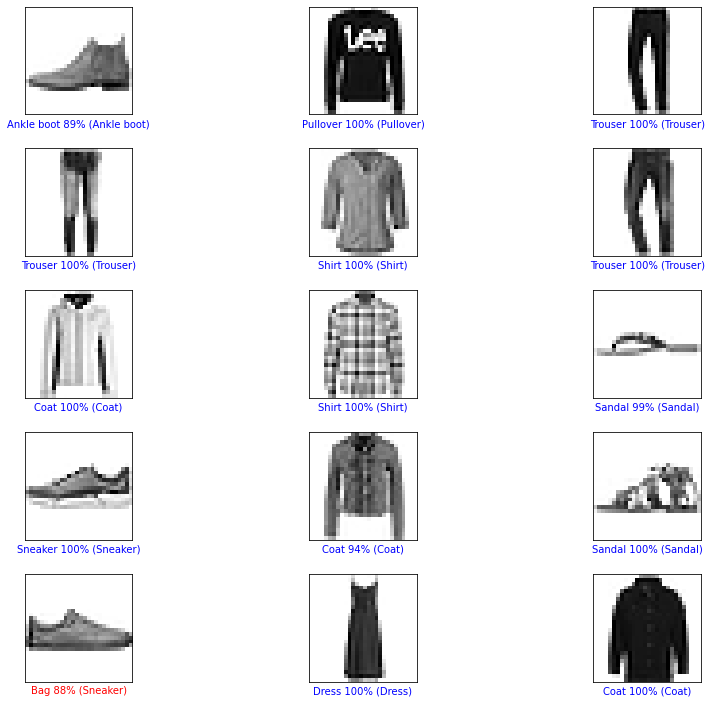

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

In [46]:
# Save the entire model as a SavedModel.
model.save('my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets
